Let's use `pip` to install some libraries that we are going to use

* pandas: Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
* seaborn: Seaborn is a Python data visualization library based on matplotlib.
* matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 
* numpy: Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.
* dvc: Data Version Control for your machine learning projects. 
* s3fs: 3FS builds on botocore to provide a convenient Python filesystem interface for S3.

In [26]:
!pip install -r ../src/train/requirements.txt --quiet

Restart the Jupyter kernel after installing pip packages.

Let's import pandas using the alias `pd`

In [2]:
import pandas as pd
import numpy as np

Let's read the CSV from a S3 bucket.

The [datasets](https://www.kaggle.com/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
import dvc.api
import s3fs
import os

# The credidcard.csv versioning metadata is kept in a git repository in os.environ['DATA_REPO'].
# We are pulling version 1.0 of the data and the data itself is from a S3 bucket that is returned
# by dvc.api.get_url()
resource_url = dvc.api.get_url(
    path='creditcard.csv',
    repo=os.environ['DATA_REPO'],
    rev='v1.0')

print("Data is from this S3 bucket:\n{}".format(resource_url))

# Pandas doens't support endpoint_url
# https://github.com/pandas-dev/pandas/pull/29050
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': os.environ['S3_ENDPOINT_URL']})
df = pd.read_csv(fs.open(resource_url))

Data is from this S3 bucket:
s3://mlflow-obc-d6e801ef-fc25-4196-9019-f539772fc981/dvcf4g2/e9/0efcb83d69faf99fcab8b0255024de


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's look at the data types. Feature 'Class' is the response variable and it takes a value of 1 in case of fraud and 0 otherwise.

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.shape

(284807, 31)

In [7]:
# Descritive stats 
df.describe().round(decimals=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [8]:
# Check for null and missing values
data = df.fillna(np.nan)
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df['Amount'].describe().round(decimals=2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

In [10]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [11]:
fraud.shape

(492, 31)

In [12]:
normal.shape

(284315, 31)

There are 492 fraud and 284315 normal transactions.

In [13]:
# Let's look at the precentage of fraud vs normal
print('Normal', round(fraud.shape[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(normal.shape[0]/len(df) * 100,2), '% of the dataset')

Normal 0.17 % of the dataset
Frauds 99.83 % of the dataset


In [14]:
normal.Amount.describe().round(decimals=2)

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe().round(decimals=2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

In [16]:
# What is the average fraud value?
print('Average Fraud: {} | Average Normal: {}'.format(normal['Amount'].mean() , fraud['Amount'].mean()))

Average Fraud: 88.29102242231328 | Average Normal: 122.21132113821139


In [17]:
# What is the highest fraud value?
print('Max Fraud: {} | Max Normal: {}'.format(normal['Amount'].max() , fraud['Amount'].max()))

Max Fraud: 25691.16 | Max Normal: 2125.87


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set()

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

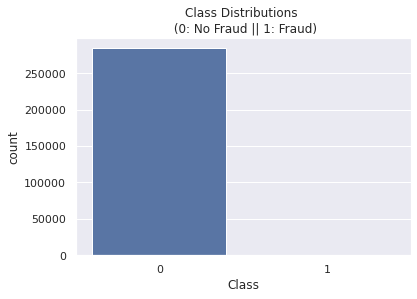

In [20]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

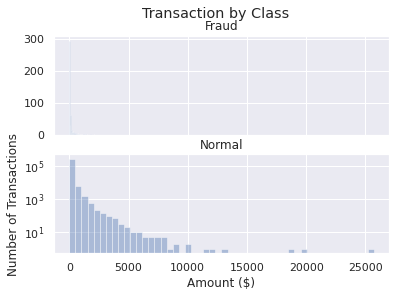

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.distplot(fraud.Amount, bins=50, kde=False, ax=ax1, axlabel=False)
sns.distplot(normal.Amount, bins=50, kde=False, ax=ax2, axlabel=False)

f.suptitle('Transaction by Class')

ax1.set_title('Fraud')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')

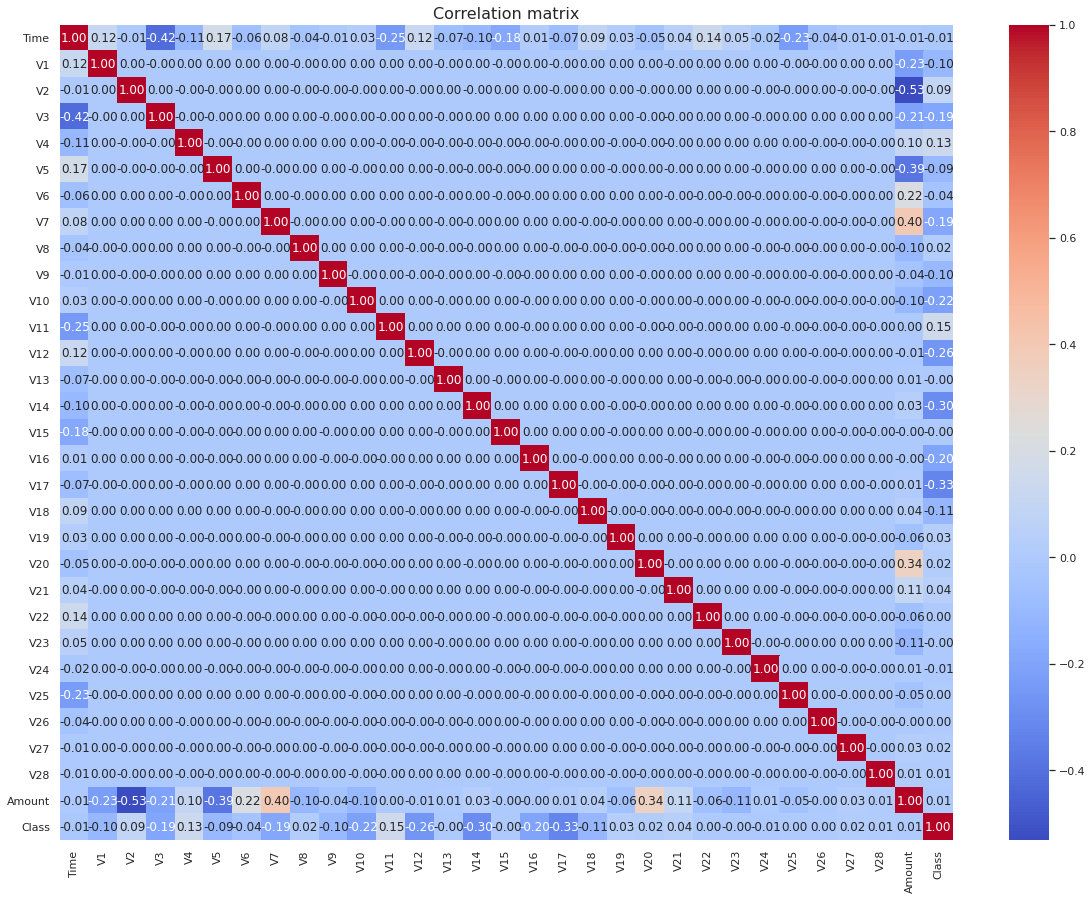

In [24]:
# Calculate pearson correlation
plt.figure(figsize=(20,15))
plt.title('Correlation matrix', fontsize=16)
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f", cmap="coolwarm")

'Class' is less correlated with ‘Amount’ and ‘Time’ which suggests it is hard to predict whether transaction is fraudulent or not from ‘Amount’ and ‘Time’ details of transaction.

'Class' is negatively correlated with ‘V3’, ‘V7’, ‘V10’, ‘V12’, ‘V14’, ‘V17’ and positively correlated with ‘V2’, ‘V4’, ‘V11’. The other correlations are relatively small.